In [1]:
# Importing Data from Excel into Python as DataFrame

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import iqr
plt.style.use('ggplot')
from sklearn import preprocessing

In [3]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_excel("default.xls", index_col=0, header=0)
df = df.iloc[1:, :]
# Checking import 
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
# Checking out the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
X1     30000 non-null object
X2     30000 non-null object
X3     30000 non-null object
X4     30000 non-null object
X5     30000 non-null object
X6     30000 non-null object
X7     30000 non-null object
X8     30000 non-null object
X9     30000 non-null object
X10    30000 non-null object
X11    30000 non-null object
X12    30000 non-null object
X13    30000 non-null object
X14    30000 non-null object
X15    30000 non-null object
X16    30000 non-null object
X17    30000 non-null object
X18    30000 non-null object
X19    30000 non-null object
X20    30000 non-null object
X21    30000 non-null object
X22    30000 non-null object
X23    30000 non-null object
Y      30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [5]:
df = df.astype(int)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
# Separating Target from rest of data 
target = df.iloc[:, -1:]
target.head()

# Taking target out of main dataframe 
df = df.iloc[:, :-1]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

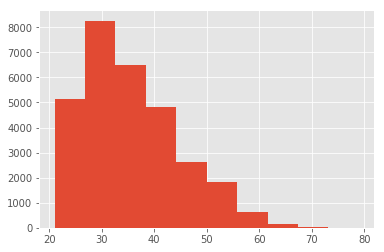

In [8]:
# Distribution of Age in the Dataset 
df['X5'].hist()
df['X5'].describe()

In [9]:
# Trying to create bins out of the age variable
pd.qcut(df['X5'], 3)
# Creating 3 equal height bins for Age 

1        (20.999, 30.0]
2        (20.999, 30.0]
3          (30.0, 39.0]
4          (30.0, 39.0]
5          (39.0, 79.0]
6          (30.0, 39.0]
7        (20.999, 30.0]
8        (20.999, 30.0]
9        (20.999, 30.0]
10         (30.0, 39.0]
11         (30.0, 39.0]
12         (39.0, 79.0]
13         (39.0, 79.0]
14       (20.999, 30.0]
15       (20.999, 30.0]
16       (20.999, 30.0]
17       (20.999, 30.0]
18         (39.0, 79.0]
19         (39.0, 79.0]
20       (20.999, 30.0]
21         (30.0, 39.0]
22         (30.0, 39.0]
23       (20.999, 30.0]
24         (39.0, 79.0]
25       (20.999, 30.0]
26       (20.999, 30.0]
27       (20.999, 30.0]
28       (20.999, 30.0]
29         (39.0, 79.0]
30       (20.999, 30.0]
              ...      
29971      (30.0, 39.0]
29972      (30.0, 39.0]
29973      (30.0, 39.0]
29974      (30.0, 39.0]
29975      (30.0, 39.0]
29976      (39.0, 79.0]
29977      (39.0, 79.0]
29978      (30.0, 39.0]
29979      (30.0, 39.0]
29980      (30.0, 39.0]
29981      (39.0

In [10]:
def binning(X5):
    if X5 > 20 and X5 <= 30:                
        return(0)
    if X5 > 30 and X5 <= 39:        
        return(1)
    if X5 > 39:      
        return(2)
df['X5_Bins'] = df['X5'].apply(binning)
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X5_Bins
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,2
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,1
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,1


In [11]:
df = df.drop(['X5'], axis=1)

In [12]:
# Checking Skew of Data 
df.skew()
# Goal to get Skew of data between [-0.5, 0.5]

X1          0.992867
X2         -0.424183
X3          0.970972
X4         -0.018742
X6          0.731975
X7          0.790565
X8          0.840682
X9          0.999629
X10         1.008197
X11         0.948029
X12         2.663861
X13         2.705221
X14         3.087830
X15         2.821965
X16         2.876380
X17         2.846645
X18        14.668364
X19        30.453817
X20        17.216635
X21        12.904985
X22        11.127417
X23        10.640727
X5_Bins     0.115017
dtype: float64

-0.5134595917536328

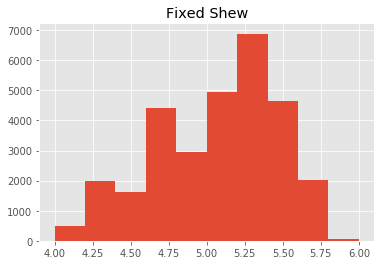

In [13]:
df['X1'] = np.log10(df['X1'])
plt.hist(df['X1'])
plt.title("Fixed Shew")
df['X1'].skew()

0.18381416335551004

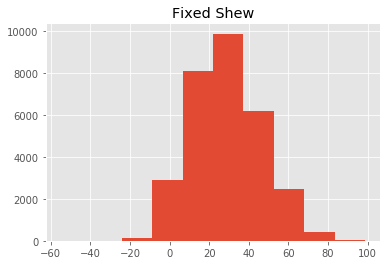

In [14]:
df['X12'] = np.cbrt(df['X12'])
plt.hist(df['X12'])
plt.title("Fixed Shew")
df['X12'].skew()

0.14408321488887335

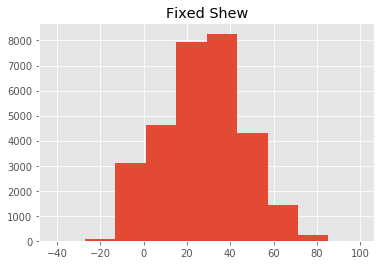

In [15]:
df['X13'] = np.cbrt(df['X13'])
plt.hist(df['X13'])
plt.title("Fixed Shew")
df['X13'].skew()

0.14274118585011475

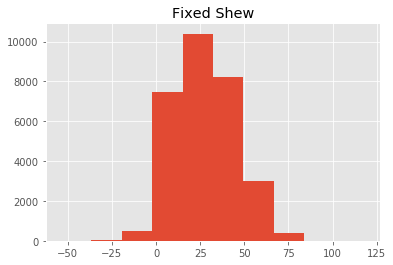

In [16]:
df['X14'] = np.cbrt(df['X14'])
plt.hist(df['X14'])
plt.title("Fixed Shew")
df['X14'].skew()

0.1432832104310938

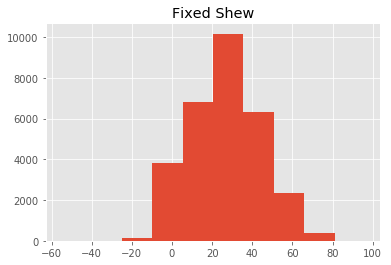

In [17]:
df['X15'] = np.cbrt(df['X15'])
plt.hist(df['X15'])
plt.title("Fixed Shew")
df['X15'].skew()

0.1598484820025544

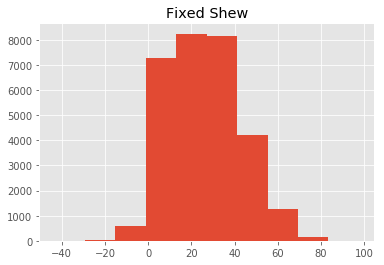

In [18]:
df['X16'] = np.cbrt(df['X16'])
plt.hist(df['X16'])
plt.title("Fixed Shew")
df['X16'].skew()

0.15650735628780213

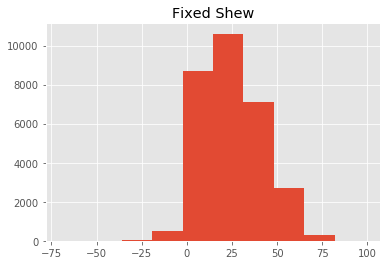

In [19]:
df['X17'] = np.cbrt(df['X17'])
plt.hist(df['X17'])
plt.title("Fixed Shew")
df['X17'].skew()

0.8355355554768575

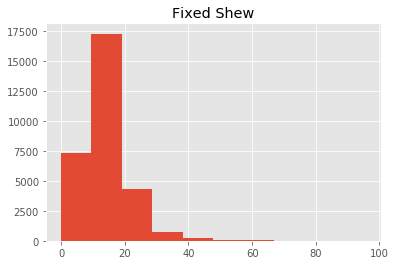

In [20]:
df['X18'] = np.cbrt(df['X18'])
plt.hist(df['X18'])
plt.title("Fixed Shew")
df['X18'].skew()

1.109112560376716

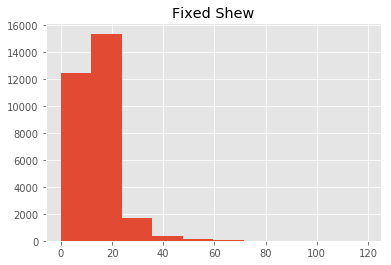

In [21]:
df['X19'] = np.cbrt(df['X19'])
plt.hist(df['X19'])
plt.title("Fixed Shew")
df['X19'].skew()

1.0503099548630996

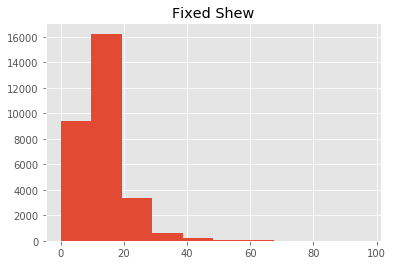

In [22]:
df['X20'] = np.cbrt(df['X20'])
plt.hist(df['X20'])
plt.title("Fixed Shew")
df['X20'].skew()

1.06232179053067

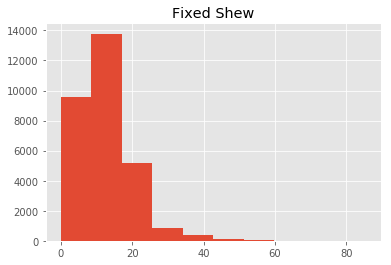

In [23]:
df['X21'] = np.cbrt(df['X21'])
plt.hist(df['X21'])
plt.title("Fixed Shew")
df['X21'].skew()

-0.9985532763546628

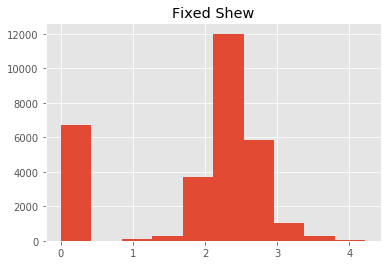

In [24]:
df['X22'] = np.cbrt(np.cbrt(df['X22']))
plt.hist(df['X22'])
plt.title("Fixed Shew")
df['X22'].skew()

-0.5266272915032604

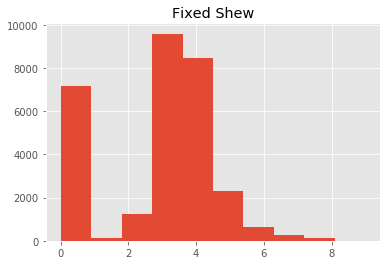

In [25]:
df['X23'] = np.sqrt(np.cbrt(df['X23']))
plt.hist(df['X23'])
plt.title("Fixed Shew")
df['X23'].skew()

In [26]:
df.skew()

X1        -0.513460
X2        -0.424183
X3         0.970972
X4        -0.018742
X6         0.731975
X7         0.790565
X8         0.840682
X9         0.999629
X10        1.008197
X11        0.948029
X12        0.183814
X13        0.144083
X14        0.142741
X15        0.143283
X16        0.159848
X17        0.156507
X18        0.835536
X19        1.109113
X20        1.050310
X21        1.062322
X22       -0.998553
X23       -0.526627
X5_Bins    0.115017
dtype: float64

In [27]:
# Defining functin to replace outliers using IQR of each column
def sd_outlier_replace(x): 
    if x > (mean + (3*SD)): 
        x = median
    # If a values is greater than the mean plus three times the standard deviation
    # This value is then replaced by the median of the columns
    elif x < (mean - (3*SD)): 
        x = median
    # If a values is less than the mean minus three times the standard deviation
    # This value is then replaced by the median of the columns
    else: 
        pass
    # Otherwise, leave the value as is 
    return(x)

Text(0.5, 1.0, 'Fixed Outliers')

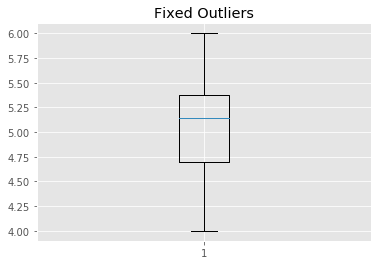

In [28]:
# Applying function to columns with outliers 
mean = df['X1'].mean()
SD = df['X1'].std()
median = df['X1'].median()
df['X1'] = df['X1'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X1'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

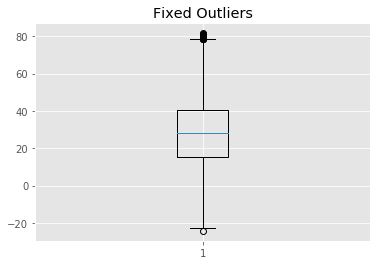

In [29]:
# Applying function to columns with outliers 
mean = df['X12'].mean()
SD = df['X12'].std()
median = df['X12'].median()
df['X12'] = df['X12'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X12'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

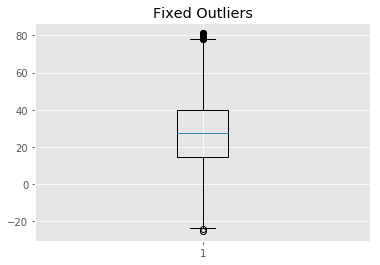

In [30]:
# Applying function to columns with outliers 
mean = df['X13'].mean()
SD = df['X13'].std()
median = df['X13'].median()
df['X13'] = df['X13'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X13'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

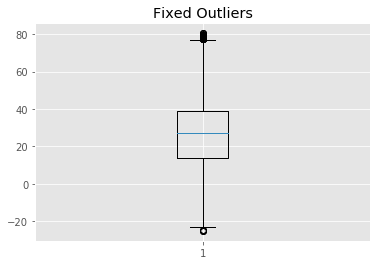

In [31]:
# Applying function to columns with outliers 
mean = df['X14'].mean()
SD = df['X14'].std()
median = df['X14'].median()
df['X14'] = df['X14'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X14'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

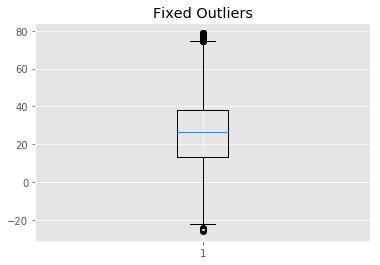

In [32]:
# Applying function to columns with outliers 
mean = df['X15'].mean()
SD = df['X15'].std()
median = df['X15'].median()
df['X15'] = df['X15'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X15'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

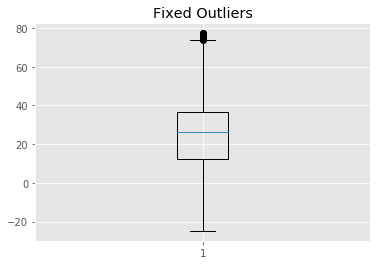

In [33]:
# Applying function to columns with outliers 
mean = df['X16'].mean()
SD = df['X16'].std()
median = df['X16'].median()
df['X16'] = df['X16'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X16'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

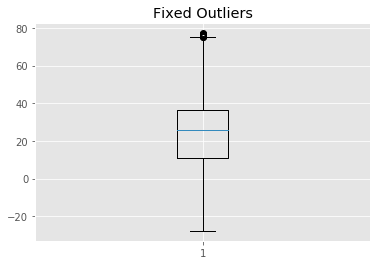

In [34]:
# Applying function to columns with outliers 
mean = df['X17'].mean()
SD = df['X17'].std()
median = df['X17'].median()
df['X17'] = df['X17'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X17'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

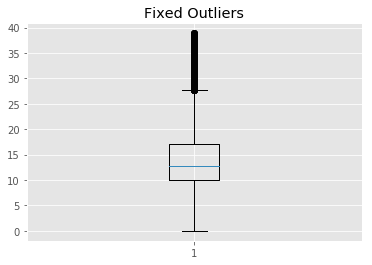

In [35]:
# Applying function to columns with outliers 
mean = df['X18'].mean()
SD = df['X18'].std()
median = df['X18'].median()
df['X18'] = df['X18'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X18'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

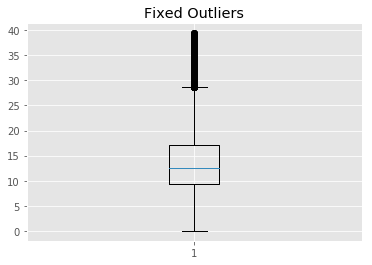

In [36]:
# Applying function to columns with outliers 
mean = df['X19'].mean()
SD = df['X19'].std()
median = df['X19'].median()
df['X19'] = df['X19'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X19'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

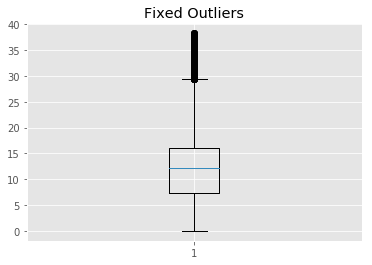

In [37]:
# Applying function to columns with outliers 
mean = df['X20'].mean()
SD = df['X20'].std()
median = df['X20'].median()
df['X20'] = df['X20'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X20'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

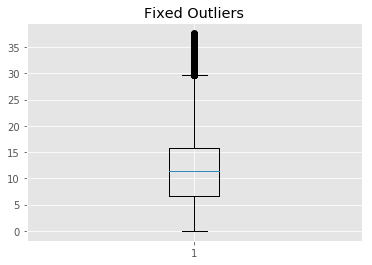

In [38]:
# Applying function to columns with outliers 
mean = df['X21'].mean()
SD = df['X21'].std()
median = df['X21'].median()
df['X21'] = df['X21'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X21'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

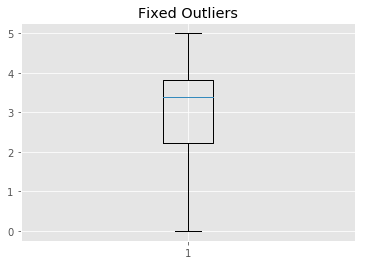

In [39]:
# Applying function to columns with outliers 
mean = df['X22'].mean()
SD = df['X22'].std()
median = df['X23'].median()
df['X23'] = df['X23'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X23'])
plt.title("Fixed Outliers")

In [40]:
dfnorm = df.drop(["X2", 'X3', 'X4', 'X5_Bins'], axis=1)
df= df.filter(["X2", 'X3', 'X4', 'X5_Bins'], axis=1)

In [41]:
# Column Names 
cols = dfnorm.columns

# Scaler function from Preprocessing 
scaler = preprocessing.StandardScaler()

# Transforming norm_df
dfnorm = scaler.fit_transform(dfnorm)

# Making DataFrame from Standardized data 
# Using column names defined earlier 
dfnorm = pd.DataFrame(dfnorm, columns=cols)

In [42]:
print(dfnorm)

             X1        X6        X7        X8        X9       X10       X11  \
0     -1.869598  1.794564  1.782348 -0.696663 -0.666599 -1.530046 -1.486041   
1      0.034263 -0.874991  1.782348  0.138865  0.188746  0.234917  1.992316   
2     -0.271418  0.014861  0.111736  0.138865  0.188746  0.234917  0.253137   
3     -0.895980  0.014861  0.111736  0.138865  0.188746  0.234917  0.253137   
4     -0.895980 -0.874991  0.111736 -0.696663  0.188746  0.234917  0.253137   
5     -0.895980  0.014861  0.111736  0.138865  0.188746  0.234917  0.253137   
6      1.550666  0.014861  0.111736  0.138865  0.188746  0.234917  0.253137   
7     -0.159466  0.014861 -0.723570 -0.696663  0.188746  0.234917 -0.616452   
8      0.198058  0.014861  0.111736  1.809921  0.188746  0.234917  0.253137   
9     -1.869598 -1.764843 -1.558876 -1.532192 -1.521944 -0.647565 -0.616452   
10     0.577048  0.014861  0.111736  1.809921  0.188746  0.234917 -0.616452   
11     0.855827 -0.874991 -0.723570 -0.696663 -0.666

In [43]:
df = pd.concat([df,dfnorm], axis=1, join='inner')
df.head()

,X2,X3,X4,X5_Bins,X1,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,2,2,1,0,0.034263,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.759368,-0.664866,-0.603803,-0.571497,-1.641267,-0.310921,-0.205920,-0.131055,-1.778571,0.509548
2,2,2,2,0,-0.271418,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.195635,-0.120099,-0.049507,0.011254,-0.143924,-0.123434,-0.205920,-0.131055,0.280704,0.871636
3,2,2,2,1,-0.895980,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.530547,0.236909,0.304360,0.353863,0.000232,0.030976,-0.124692,-0.089093,0.296028,0.270117
4,2,2,1,1,-0.895980,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,0.321150,0.068702,0.073899,0.113984,0.000232,2.698176,1.290655,1.272987,0.197210,0.147951
5,1,2,1,2,-0.895980,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.641347,0.028569,0.086627,0.137559,0.126985,-0.026143,-0.375307,-0.131055,0.280704,0.198740


In [44]:
# Checking mean for standardized 
# Want to see mean very close to 0 
df.mean()

X2         1.603753
X3         1.853128
X4         1.551885
X5_Bins    0.937665
X1         0.000062
X6        -0.000060
X7        -0.000059
X8         0.000023
X9         0.000022
X10        0.000051
X11        0.000050
X12        0.000024
X13        0.000025
X14        0.000035
X15        0.000051
X16        0.000049
X17        0.000047
X18        0.000055
X19        0.000015
X20        0.000050
X21        0.000048
X22        0.000059
X23        0.000056
dtype: float64

In [45]:
# Checking standard deviation of standardized data
# Want std dev of each column close to 1 
df.std()

X2         0.489125
X3         0.790361
X4         0.521969
X5_Bins    0.817328
X1         0.999975
X6         0.999980
X7         0.999980
X8         1.000025
X9         1.000026
X10        0.999994
X11        0.999997
X12        1.000024
X13        1.000024
X14        1.000015
X15        0.999995
X16        0.999997
X17        1.000000
X18        0.999988
X19        1.000030
X20        0.999996
X21        0.999999
X22        0.999981
X23        0.999986
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40e7ae34e0>,
      dtype=object)

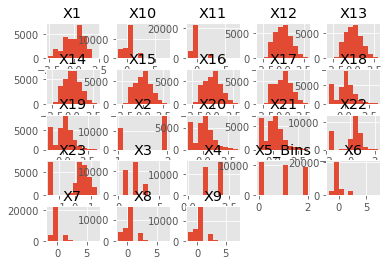

In [46]:
df.hist()

In [47]:
df = pd.concat([df,target], axis=1, join='inner')
df.head()

,X2,X3,X4,X5_Bins,X1,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,2,2,1,0,0.034263,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.664866,-0.603803,-0.571497,-1.641267,-0.310921,-0.205920,-0.131055,-1.778571,0.509548,1
2,2,2,2,0,-0.271418,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.120099,-0.049507,0.011254,-0.143924,-0.123434,-0.205920,-0.131055,0.280704,0.871636,1
3,2,2,2,1,-0.895980,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.236909,0.304360,0.353863,0.000232,0.030976,-0.124692,-0.089093,0.296028,0.270117,0
4,2,2,1,1,-0.895980,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,0.068702,0.073899,0.113984,0.000232,2.698176,1.290655,1.272987,0.197210,0.147951,0
5,1,2,1,2,-0.895980,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.028569,0.086627,0.137559,0.126985,-0.026143,-0.375307,-0.131055,0.280704,0.198740,0


In [48]:
y = df.loc[:, ['Y']].values.ravel()

dfnew = df.drop(['Y'], axis=1)

In [49]:
# Recursive Feature Elimination for Y1 target 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dfnew, y)
# summarize the selection of the attributes
print(rfe.support_)
print(dict(zip(df.columns, rfe.ranking_)))

[ True  True  True False False False False False False False False False
 False False False False False False False False False False False]
{'X2': 1, 'X3': 1, 'X4': 1, 'X5_Bins': 11, 'X1': 14, 'X6': 2, 'X7': 20, 'X8': 17, 'X9': 7, 'X10': 8, 'X11': 13, 'X12': 16, 'X13': 15, 'X14': 3, 'X15': 4, 'X16': 5, 'X17': 6, 'X18': 10, 'X19': 18, 'X20': 9, 'X21': 12, 'X22': 21, 'X23': 19}


In [50]:
# Exporting DataFrame as CSV 
df.to_csv('Final3', ',')

In [51]:
# FIN

In [52]:
# Logistic Regression 
df.columns.values

array(['X2', 'X3', 'X4', 'X5_Bins', 'X1', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'], dtype=object)

In [53]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [55]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [56]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5880,    0],
       [1620,    0]])

Text(0.5, 257.44, 'Predicted label')

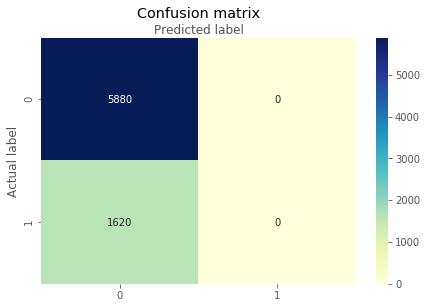

In [57]:
import seaborn as sns


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.784
Precision: 0.0
Recall: 0.0


/home/jupyter-jhoffmann/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
# Feature Importance 
from sklearn import metrics 
from sklearn.ensemble import ExtraTreesClassifier

# Fit an Extra Trees model to the data 
model = ExtraTreesClassifier()
model.fit(X,y)

# Display the relative importance of each attribute 
#print(model.feature_importances_)
print(dict(zip(df.columns, model.feature_importances_)))

{'X2': 0.00683676500117269, 'X3': 0.033280705252300605, 'X4': 0.02413348281406376, 'X5_Bins': 0.020562446607370867, 'X1': 0.08086304034960631, 'X6': 0.03021617091842153, 'X7': 0.02048492314913237, 'X8': 0.019887260579683912, 'X9': 0.019440276387926322, 'X10': 0.018666829538880315, 'X11': 0.02227293956646825, 'X12': 0.06595788060751648, 'X13': 0.061496425044009574, 'X14': 0.05927610343340428, 'X15': 0.05924571983365362, 'X16': 0.0581650399664597, 'X17': 0.0578065286072074, 'X18': 0.059671571384672606, 'X19': 0.05750688430797417, 'X20': 0.0563528828411944, 'X21': 0.05625760847354835, 'X22': 0.05382782927660875, 'X23': 0.05779068605872376}
